## Introduction to statistics in Python is in DataCamp.ipynb

## Introduction to Regression with statsmodels in Python

In [32]:
from statsmodels.formula.api import ols
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels

### Main concepts

The response variable (dependent variable) is the one you want to predict.

Explanatory variables (independent variables) - the variables that explain how the response variable will change.

Linear regression - the response variable is numeric. Logistic regression - the response variable is logical (True/False values).

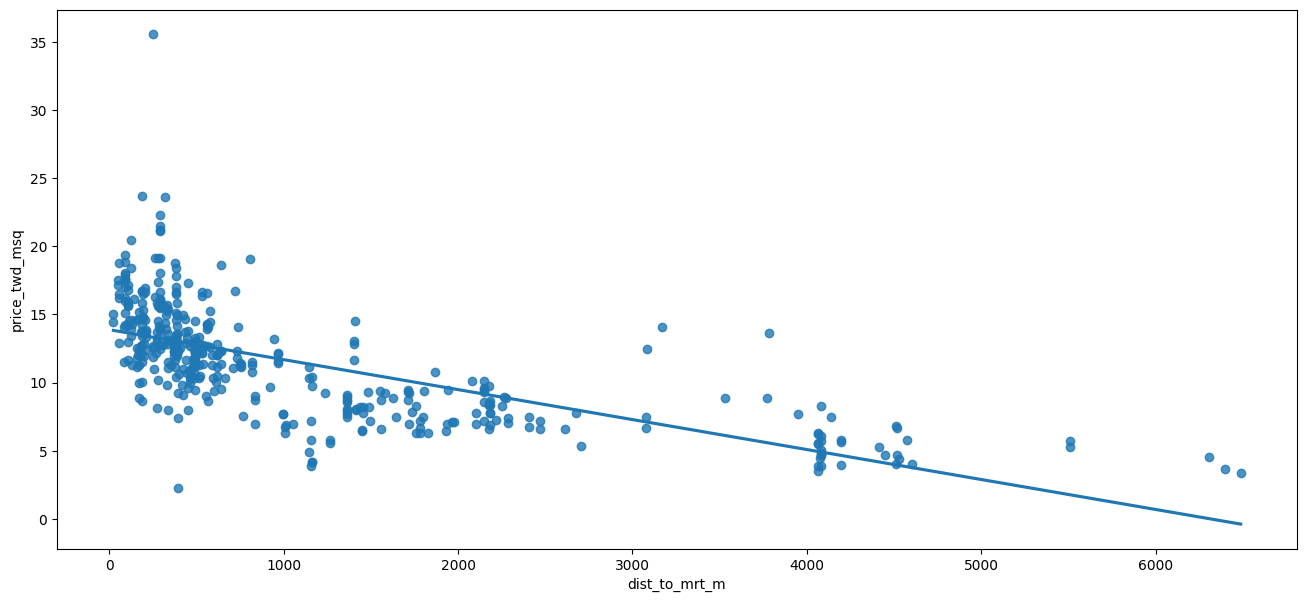

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
df = pd.read_csv("databases/taiwan.csv")

#we use regplot to add a trendline
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=df, ci=None)
plt.show()

### Fitting a linear regression with a numeric explanatory variable

***Intercept*** - the ```y``` value at the point where ```x= 0 ```

***Slope*** - the amount the ```y``` value increases if you increase ```x``` by one

***Equation:*** ```y = intercept + slope * x```

In [34]:
from statsmodels.formula.api import ols #ordinary least squares

mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=df)
mdl_price_vs_conv = mdl_price_vs_conv.fit()
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### Fitting a linear regression with a categorical explanatory variable

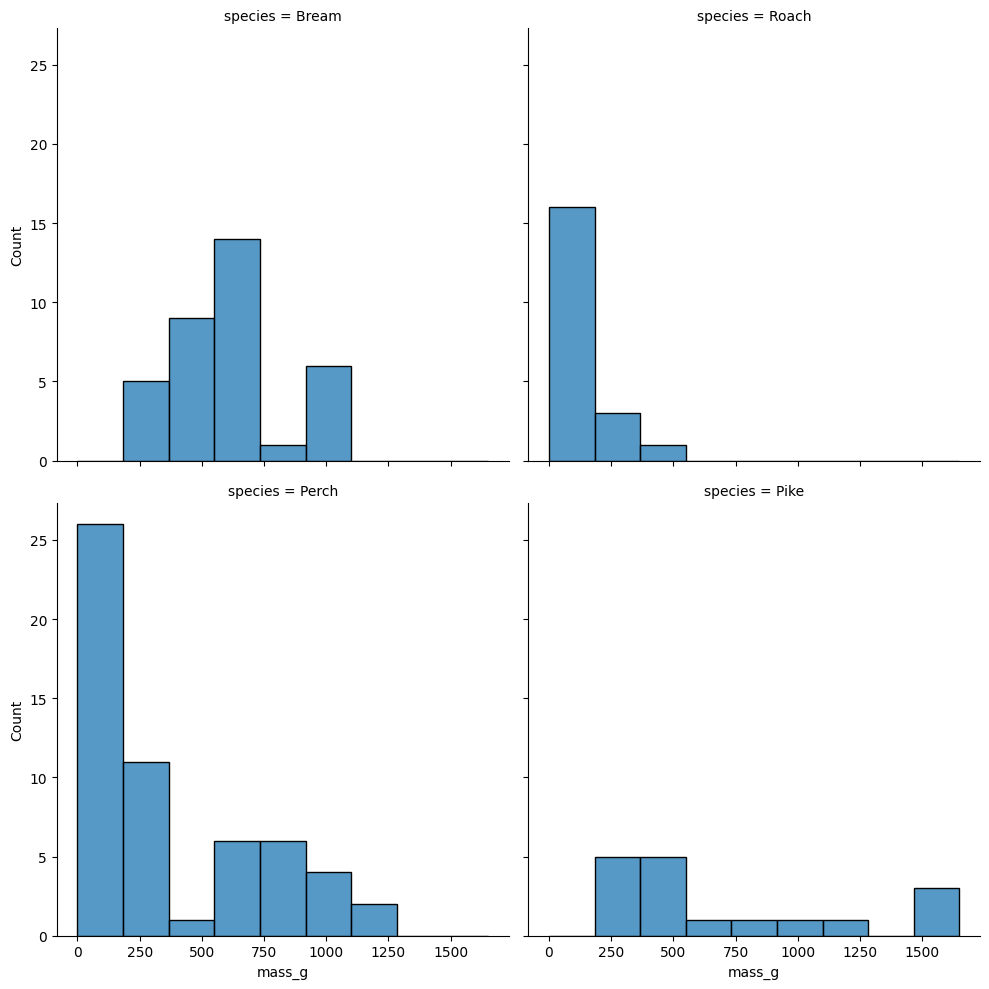

<Figure size 1600x700 with 0 Axes>

In [35]:
fish = pd.read_csv("databases/fish.csv")

sns.displot(data=fish,
            x="mass_g",
            col="species",
            col_wrap= 2,
            bins=9)
plt.figure(figsize=(16,7))
plt.show()

In [36]:
from statsmodels.formula.api import ols

#be adding zero we specify that all the coefficients should be added relative to 0
#in other words we are fitting a linear regr without an interceptor
model = ols("mass_g ~ species + 0", data=fish).fit()

print(model.params) #basically shows the mean of each fish kind

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


### Making predictions

In [37]:
bream = fish[fish["species"] == "Bream"]

mdl_mass_length = ols("mass_g ~ length_cm", data = bream).fit()
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})
print(mdl_mass_length.predict(explanatory_data))

#!Notice that np.arange is basically the same as range() function
#However it returns an array of values instead of a list

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


As i understand the advantage of using ***assign function*** to add a column instead of a more traditional way to do so is that it doesn't modify the original df

In [38]:
prediction_data = explanatory_data.assign(
    mass_g=mdl_mass_length.predict(explanatory_data))
print(prediction_data.head())

   length_cm      mass_g
0         20   55.652054
1         21  110.202035
2         22  164.752015
3         23  219.301996
4         24  273.851977


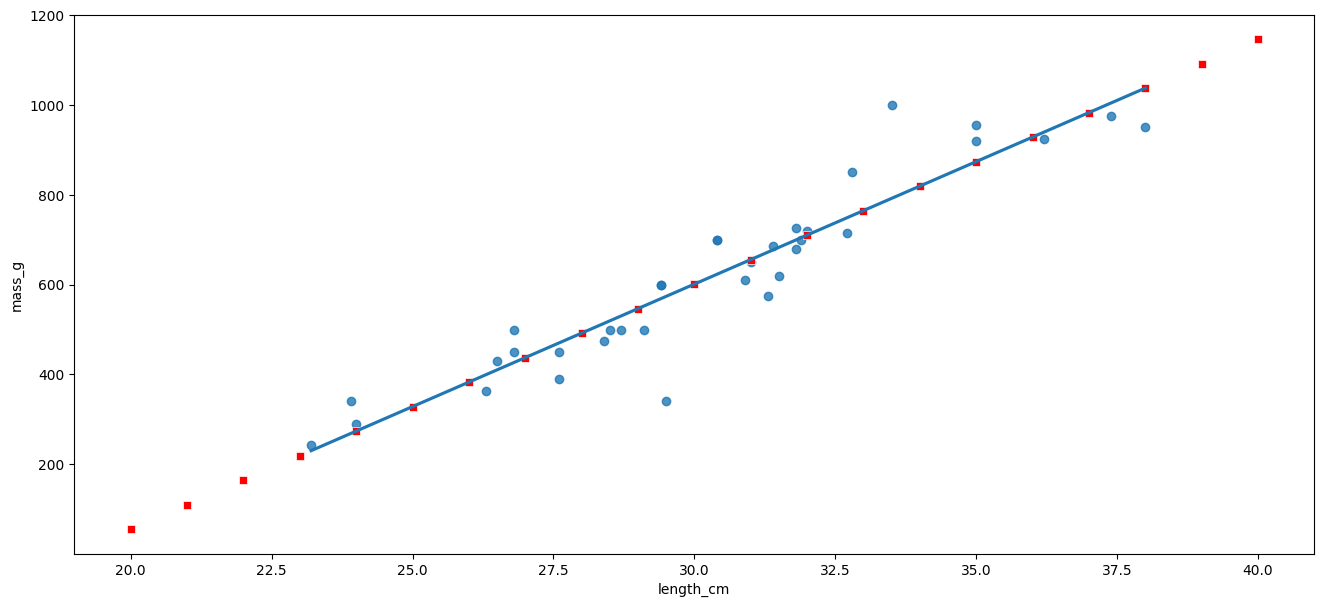

In [39]:
fig = plt.figure(figsize=(16,7)) #to create multiple plots on one plot
sns.regplot(x="length_cm",
            y="mass_g",
            ci=None,
            data=bream,)
sns.scatterplot(x="length_cm",
                y="mass_g",
                color="red",
                data=prediction_data,
                marker="s")
plt.show()

Extrapolating means making predictions outside the range of observed data. Should be used carefully as it is not always appropriate

### Working with model objects

we have already used .params attribute

In [40]:
#predictions on the original dataset
#we take the length from the original data ant try to "predict" weight
print(mdl_mass_length.fittedvalues.head(5))

0    230.211993
1    273.851977
2    268.396979
3    399.316934
4    410.226930
dtype: float64


In [41]:
#Each resid is an actual response value - predicted response values
print(mdl_mass_length.resid.head())

#same as 
print((bream["mass_g"] - mdl_mass_length.fittedvalues).head(5))

0    11.788007
1    16.148023
2    71.603021
3   -36.316934
4    19.773070
dtype: float64
0    11.788007
1    16.148023
2    71.603021
3   -36.316934
4    19.773070
dtype: float64


In [42]:
mdl_mass_length.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.22e-16
Time:                        13:17:02   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Response value = fitted value (the staff you explained with a model) + residual (the staff you couldn't explain)

***Regression to the mean*** - extreme cases do not persist over time  

In [43]:
sp500 = pd.read_csv("databases/sp500.csv")
sp500.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


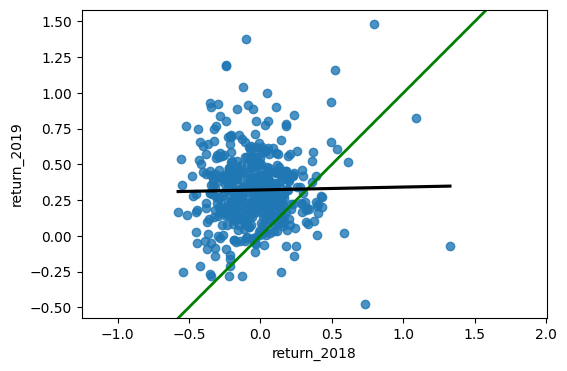

In [44]:
# Create a new figure, fig
fig = plt.figure(figsize=(6,4))

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",
            y="return_2019",
            data=sp500,
            ci = None,
            line_kws={"color":"black"},
            )

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

### Transforming variables

We can see that the relationship is not relly linear.
In this cases we should use variable transformation

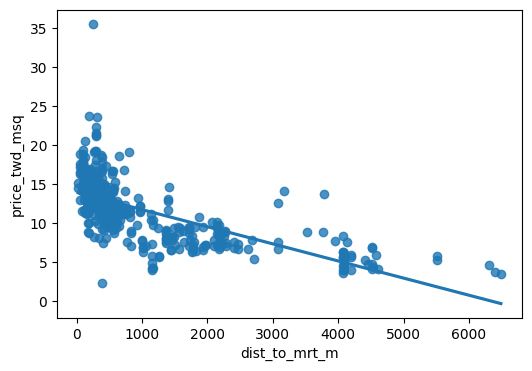

In [45]:
taiwan = pd.read_csv("databases/taiwan.csv")

plt.figure(figsize=(6,4))
sns.regplot(x="dist_to_mrt_m",
            y="price_twd_msq",
            data=taiwan,
            ci=None,
            )

plt.show()

Now it looks better

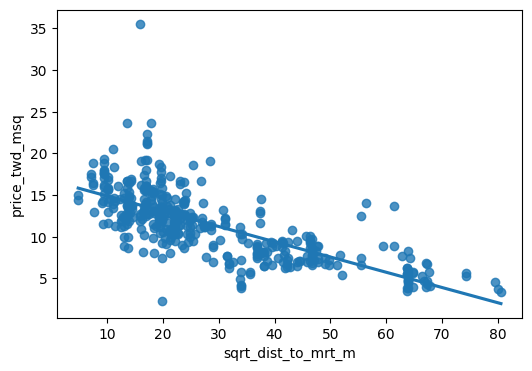

In [46]:
taiwan["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan["dist_to_mrt_m"])

plt.figure(figsize=(6,4))
sns.regplot(x="sqrt_dist_to_mrt_m",
            y="price_twd_msq",
            data=taiwan,
            ci=None,
            )

plt.show()

Similar example from the excersises

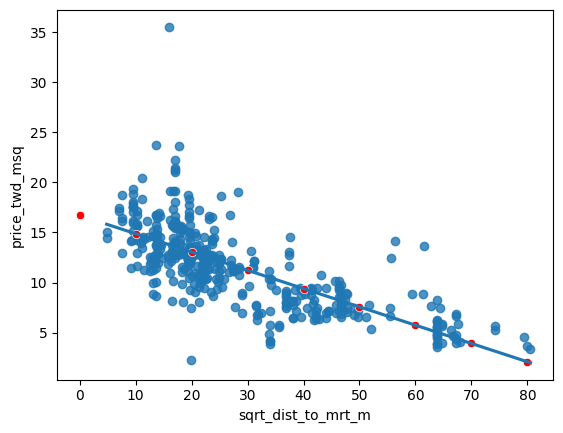

In [47]:
# Create sqrt_dist_to_mrt_m
taiwan["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m",
            y="price_twd_msq",
            data=taiwan,
            ci=None)  #ci stands for confidence interval and it is between 0 and 100

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m",
                y="price_twd_msq", 
                data=prediction_data,
                color="red")
plt.show()

***Revision given by DataCamp***

Model Coefficients: By accessing the ```.params``` attribute of a model object created by ```ols()```, you can retrieve the intercept and slope, which are crucial for understanding the relationship between your variables.

Fitted Values and Residuals: The ```.fittedvalues``` attribute gives you the model's predictions on the original dataset, while the ```.resid``` attribute provides the residuals, indicating the inaccuracy of the model fit. Each residual represents the difference between the actual and predicted values.

Manual Predictions: You explored manually calculating predictions using the model's coefficients. This process involves simple arithmetic: multiplying the slope by the explanatory variable and adding the intercept.

### Assessing model fit - Quantifying fit

Coefficient of determination - "R-squared"

1 means a perfect fit and 0 means the worst fit

In [48]:
#We can find R via
print(mdl_price_vs_dist.summary())

#Or even better:
print(mdl_price_vs_dist.rsquared)

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           4.55e-70
Time:                        13:17:03   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.7098      0

Residual standard error (RSE) - the difference between predicted and an observed value

MSE (Mean squared error) = RSE ** 2

In [49]:
mse = round(mdl_price_vs_dist.mse_resid, 2)
print(f"MSE: {mse}")
print(f"RSE: {round(np.sqrt(mse), 2)}")

MSE: 7.94
RSE: 2.82


### Assessing model fit - Visualizing model fit

Residplot

Text(0, 0.5, 'Residuals')

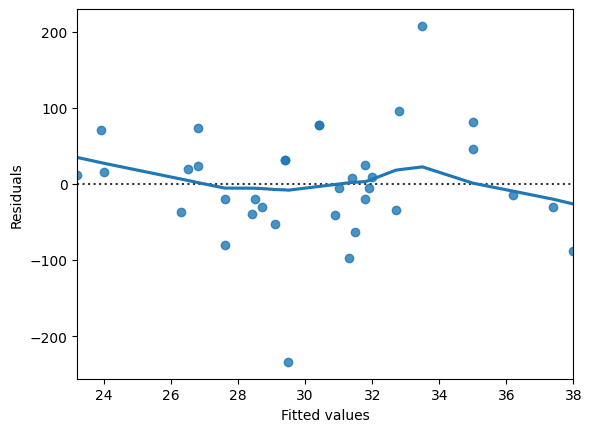

In [50]:
fish = pd.read_csv("databases/fish.csv")
bream = fish[fish["species"] == "Bream"]

sns.residplot(x="length_cm", y="mass_g", data=bream, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

qqplot

<Figure size 640x480 with 0 Axes>

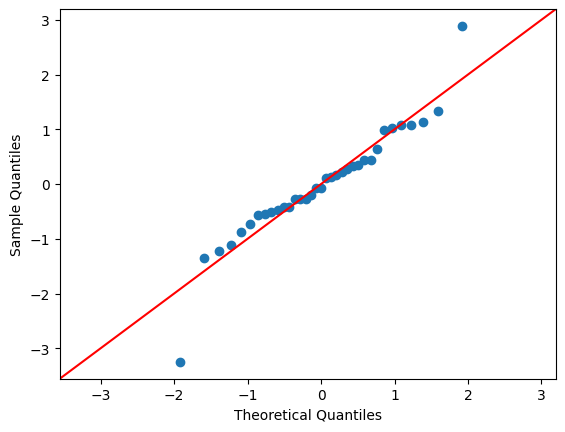

In [51]:
from statsmodels.api import qqplot

model_bream = ols("mass_g ~ length_cm", data=bream).fit()

plt.figure()
qqplot(data=model_bream.resid, fit=True, line="45")
plt.show()

This was rather a vague topic, so when revising i strongly recommed to rewatch the videos

Scale-location plot

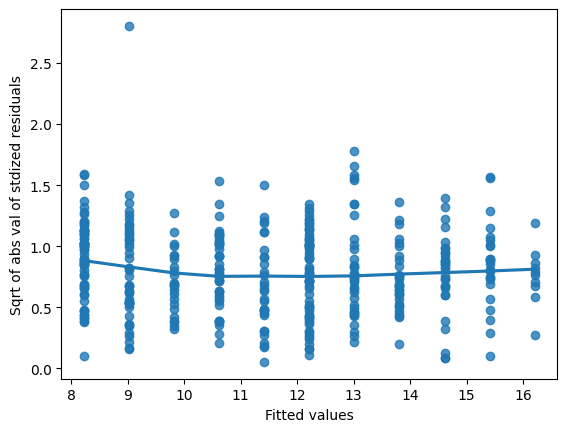

In [52]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

### Outliers, leverage and influence

Outliers are self-explanatory

***Leverage*** - is a measure of how extreme the xplanatory variable values are

***Influence*** - measures how much the model would change if you left the observation out of the dataset when modeling

In [57]:
model_bream.get_influence().summary_frame().sort_values("cooks_d", ascending=False).head()

,dfb_Intercept,dfb_length_cm,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
29,-0.443513,0.513017,0.226536,2.879590,0.051809,0.673107,3.277081,0.766021
34,0.492168,-0.523694,0.162726,-1.290865,0.163398,-0.570485,-1.304518,-0.576519
13,-0.222985,0.148305,0.158869,-3.202494,0.030050,-0.563683,-3.798652,-0.668615
2,0.355861,-0.336535,0.073798,1.030540,0.122020,0.384183,1.031540,0.384556
31,-0.241989,0.267199,0.055499,1.139462,0.078757,0.333163,1.144812,0.334727


### Logistic regression